# Algoritmos de Clasificación - Classification Algorithms

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns #for plotting
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from matplotlib import pylab
from scipy import stats
from sklearn import preprocessing
from pomegranate import *
from vecstack import stacking

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from scipy.spatial import Voronoi
from collections import OrderedDict
from sklearn.datasets import make_classification

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_csv("dfMedidas_completes.csv", sep=';')
df = data.copy()

In [3]:
df.head()

,Dia,Dia_mes,Mes,Dia_sem,Lluvia,Lluvia_SN,Fecha,T_MAX_ALERTA,T_MAX,T_MIN,...,PM2.5_MAX,PM10_MAX,O3_MAX,TOL_MAX,BEN_MAX,EBE_MAX,TCH_MAX,O3_Nivel,Dia_sem_num,Mes2
0,1,1,ENE,J,0.0,No,01/01/2015,V,10.7,-0.6,...,33,64,20,9.1,3.9,1.9,2.44,V,2,ENE
1,2,2,ENE,V,0.0,No,02/01/2015,V,12.5,-0.4,...,23,36,22,11.5,4.0,2.4,2.31,V,6,ENE
2,3,3,ENE,S,0.0,No,03/01/2015,V,11.7,1.4,...,22,30,24,12.8,3.6,2.1,2.43,V,5,ENE
3,4,4,ENE,D,0.0,No,04/01/2015,V,14.4,1.4,...,20,33,32,11.9,3.5,2.6,2.24,V,1,ENE
4,5,5,ENE,L,0.0,No,05/01/2015,V,12.3,2.0,...,22,31,25,9.9,3.1,2.4,2.31,V,3,ENE


In [4]:
df.O3_Nivel = pd.Categorical(df.O3_Nivel)
df.Lluvia_SN = pd.Categorical(df.Lluvia_SN)

le = preprocessing.LabelEncoder()

df['Lluvia_SN'] = le.fit_transform(df['Lluvia_SN'])
df['O3_Nivel'] = le.fit_transform(df['O3_Nivel'])

In [189]:
df["O3_Nivel"] = pd.cut(df["O3_MAX"], np.r_[df["O3_MAX"].min(),75, 100,df["O3_MAX"].max()],
                                labels=["V", "A", "R"],right=False)

# dfMedidas$O3_Nivel <- cut(dfMedidas$O3_MAX, c(min(dfMedidas$O3_MAX), 75, 100, max(dfMedidas$O3_MAX)),
# include.lowest = TRUE, right = FALSE, labels = c("V", "A", "R"))

In [5]:
X = df[["Lluvia_SN","Lluvia","T_MAX","T_MIN","Viento_MAX","Viento_MED"]]
y = df["O3_Nivel"]


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.40, 
                                                    random_state = 42)

# library(caret)
# set.seed(1234)
# attach(dfMedidas)
# entrena      <- createDataPartition(dfMedidas$O3_Nivel, p=0.6, list=FALSE)
# setEntrena   <- dfMedidas[entrena,]  #el conjunto de entrenamiento
# setValida    <- dfMedidas[-entrena,] #el conjunto de validación

## LDA, Linear Discriminant Analysis

In [6]:
res = LinearDiscriminantAnalysis()
res_model = res.fit(X_train, y_train)

# res.lda <- lda(O3_Nivel ~  Lluvia_SN + Lluvia + T_MAX + T_MIN + Viento_MAX + Viento_MED, data = setEntrena)

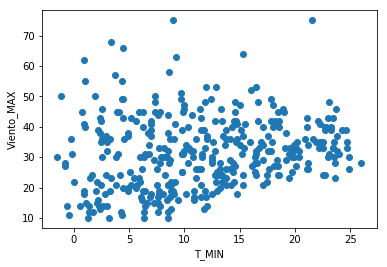

In [7]:
xi = df.T_MIN
y = df.Viento_MAX

plt.plot(xi,y,'o')
plt.xlabel("T_MIN")
plt.ylabel("Viento_MAX")
ax = plt.gca()
fig = plt.gcf()

# plot(T_MIN, Viento_MAX, pch = 20, col = as.integer(O3_Nivel))
# points(res.lda$means[,c(4,5)], pch = 4, lwd = 2, cex = 4, col = 142)

In [153]:
# I couldn't paint density visualization

In [8]:
scaler = StandardScaler()
X_train_scaled = res_model.transform(X_train)
X_test_scaled = res_model.transform(X_test)

# res.lda$scaling

In [9]:
X_test_scaled[0:5]

array([[-1.89341517, -1.01267666],
       [ 0.6916145 ,  2.22122595],
       [ 1.48621609,  1.31243971],
       [ 1.36736711, -1.39677846],
       [ 0.90186811,  0.37440021]])

In [156]:
y_pred = res_model.predict(X_test)
# predice.lda <- predict(res.lda, dfMedidas)

In [157]:
# confusion_matrix(y, y_pred)

# predice.modelo.lda <- predict(modelo.lda, setValida)
# c <- confusionMatrix(predice.modelo.lda$class, setValida$O3_Nivel)
# print(c)

In [6]:
# accuracy_score(y, y_pred)

# compara_ACC <- data.frame(c$overall[1], row.names = "LDA")
# colnames(compara_ACC) <- "Accuracy"

## Clasificadores probabilísticos

### Naive Bayes

In [163]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

# library(naivebayes)
# modelo.nb <- naive_bayes(O3_Nivel ~  Lluvia_SN + Lluvia + T_MAX + T_MIN + Viento_MAX + Viento_MED, data = setEntrena)

GaussianNB(priors=None, var_smoothing=1e-09)

In [164]:
nb_model.predict(X_test)[0:10]
# predict(modelo.nb, setValida[1,], type = "prob")

array([1, 2, 2, 2, 2, 1, 2, 2, 1, 2])

In [165]:
nb_model.predict_proba(X_test)[0:10]

array([[1.61962370e-03, 9.98354548e-01, 2.58282162e-05],
       [2.67604119e-01, 0.00000000e+00, 7.32395881e-01],
       [4.86016458e-02, 0.00000000e+00, 9.51398354e-01],
       [1.80153195e-02, 5.83756880e-05, 9.81926305e-01],
       [9.50544256e-02, 2.63856504e-04, 9.04681718e-01],
       [8.17774109e-03, 9.91749181e-01, 7.30775944e-05],
       [2.12659818e-02, 0.00000000e+00, 9.78734018e-01],
       [1.83756270e-01, 1.74032639e-01, 6.42211090e-01],
       [5.65576703e-03, 9.91668984e-01, 2.67524875e-03],
       [1.22372992e-01, 4.31103745e-01, 4.46523263e-01]])

In [166]:
y_pred = nb_model.predict(X_test)

In [167]:
accuracy_score(y_test, y_pred)

0.5753424657534246

In [168]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.6484569597069597

### Redes Bayesianas - Bayesian Networks

In [195]:
# pip install pomegranate

In [10]:
#red.bn <- hc(setEntrena[,c("O3_Nivel", "Lluvia_SN", "Lluvia", "T_MAX", "T_MIN", "Viento_MAX",
#                           "Viento_MED")], score = "aic-cg", optimized = TRUE) #obtener la red

## Árboles de Decisión - Decision Trees

### CART (Classification and Regression Trees)

In [80]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [9]:
cart_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [202]:
y_pred = cart_model.predict(X_test)

In [203]:
accuracy_score(y_test, y_pred)

0.5958904109589042

In [1]:
# pip install graphviz
# !pip install pydotplus

# import graphviz
# from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# import pydotplus

# dot_data = StringIO()
# export_graphviz(cart, out_file=dot_data,  
#                 filled=True, rounded=True, special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())

# I couldn't get the image

# library(rpart)
# modelo.rpart <- rpart(O3_Nivel ~ Lluvia_SN + Lluvia + T_MAX + T_MIN + Viento_MAX + Viento_MED, data = setEntrena, method="class")
# par(mar=c(0,0,0,0))
# plot(modelo.rpart)
# text(modelo.rpart, cex = 0.75)

In [205]:
# Model Tuning

In [206]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [207]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 3101 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   22.2s finished


In [208]:
print("Best parameters: " + str(cart_cv_model.best_params_))

Best parameters: {'max_depth': 4, 'min_samples_split': 4}


In [209]:
cart = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split =4)
cart_tuned = cart.fit(X_train, y_train)

In [210]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.684931506849315

In [211]:
Importance = pd.DataFrame({"Importance": cart_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Importance')

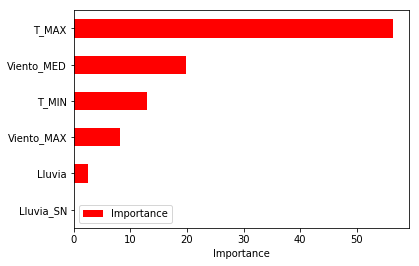

In [212]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Importance")

# modelo.rpart$variable.importance

### Árboles de inferencia condicional, CTREE

In [ ]:
# There doesn't seem to be an implementation in Python

### C5.0

In [ ]:
# C5.0 is Quinlan’s latest version release under a proprietary license. 
# It uses less memory and builds smaller rulesets than C4.5 while being more accurate.

 ### Meta-algoritmos

#### AdaBoost ADAptative BOOSTing

In [170]:
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1)
adaboost_model = adaboost.fit(X_train, y_train)

In [171]:
y_pred = adaboost_model.predict(X_test)

# library(adabag)
# modelo.adaboost <- boosting(O3_Nivel ~ Lluvia_SN + Lluvia + T_MAX + T_MIN + Viento_MAX +
#                              Viento_MED, data = setEntrena, boos = TRUE, mfinal = 10, #10 árboles
#                            coeflearn = "Breiman")

In [172]:
confusion_matrix(y_test, y_pred)

array([[22,  2, 35],
       [ 6,  4,  1],
       [15,  0, 61]], dtype=int64)

In [173]:
Importance = pd.DataFrame({"Importance": adaboost_model.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Importance')

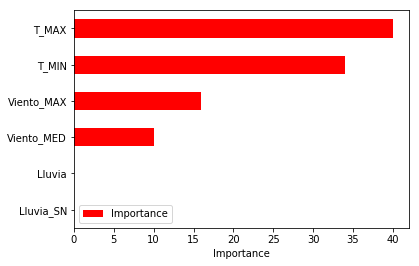

In [174]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Importance")

# modelo.adaboost$importance

#### GBM (Gradient Boosting Machine)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [47]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

Text(0, 0.5, 'Multinominal Deviance')

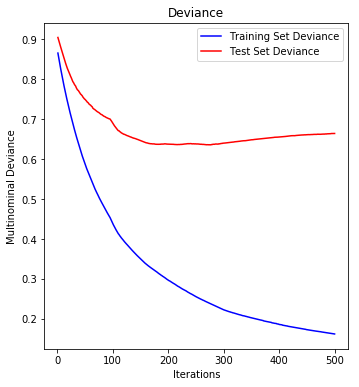

In [48]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Iterations')
plt.ylabel('Multinominal Deviance')

# n <- gbm.perf(modelo.gbm,  plot.it = TRUE,  oobag.curve = FALSE,  overlay = TRUE,  method="test")

In [176]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

# library(gbm)
# set.seed(123)
# modelo.gbm <- gbm(O3_Nivel ~ Lluvia_SN + Lluvia + T_MAX + T_MIN + Viento_MAX + Viento_MED, 
#                  data = setEntrena, distribution = "multinomial", interaction.depth = 3, 
#                  shrinkage = 0.01, n.trees = 500, train.fraction = 0.7)

In [177]:
y_pred = gbm_model.predict(X_test)

In [178]:
accuracy_score(y_test, y_pred)

0.9090909090909091

In [179]:
gbm_model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [41]:
?gbm_model

Type:        GradientBoostingClassifier
String form:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
           learning_rate=0.1,  <...>    subsample=1.0, tol=0.0001, validation_fraction=0.1,
           verbose=0, warm_start=False)
Length:      100
File:        c:\users\lenovo\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py
Docstring:  
Gradient Boosting for classification.

GB builds an additive model in a
forward stage-wise fashion; it allows for the optimization of
arbitrary differentiable loss functions. In each stage ``n_classes_``
regression trees are fit on the negative gradient of the
binomial or multinomial deviance loss function. Binary classification
is a special case where only a single regression tree is induced.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'deviance', 'exponential'}, optional (default='deviance')
    loss function to be optimized. 'deviance' refers to
    deviance (= logistic re

In [42]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,1000],
             "max_depth": [3,5,10]}

In [43]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [44]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  4.6min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05], 'n_estimators': [100, 500, 1000], 'max_depth': [3, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [45]:
print("Best parameters: " + str(gbm_cv.best_params_))

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}


In [245]:
gbm = GradientBoostingClassifier(learning_rate = 0.01, 
                                 max_depth = 3,
                                n_estimators = 500)

# modelo.gbm <- gbm(O3_Nivel ~ Lluvia_SN + Lluvia + T_MAX + T_MIN + Viento_MAX + Viento_MED, 
#                  data = setEntrena, distribution = "multinomial", interaction.depth = 3, 
#                  shrinkage = 0.01, n.trees = 500, train.fraction = 0.7)

In [246]:
gbm_tuned = gbm.fit(X_train, y_train)

In [247]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.6818181818181818

#### Random Forest

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [50]:
RANDOM_STATE = 123

X_train, y_train = make_classification(n_samples=500, n_features=25,
                           n_clusters_per_class=1, n_informative=15,
                           random_state=RANDOM_STATE)

# Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

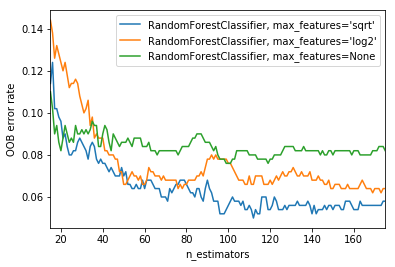

In [51]:
# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

# plot(modelo.RF)
# modelo.RF.leyenda <- if (is.null(modelo.RF$test$err.rate)) {colnames(modelo.RF$err.rate)} else {colnames(modelo.RF$test$err.rate)}
# legend("top", cex =0.5, legend = modelo.RF.leyenda, lty=c(1,2,3,4), col=c(1,2,3,4), horiz=T)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [54]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

# library(randomForest)
# set.seed(11)
# modelo.RF <- randomForest(O3_Nivel ~ Lluvia_SN + Lluvia + T_MAX + T_MIN + Viento_MAX + Viento_MED,
#                           data = setEntrena, ntree=200, importance=T)

In [216]:
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [217]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6909090909090909

In [218]:
# Model Tuning

In [219]:
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [220]:
rf_params = {"max_depth": [2,5,8,10],
            "n_estimators": [10,100,200]}

In [221]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [222]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 102 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    8.6s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 5, 8, 10], 'n_estimators': [10, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [223]:
print("Best parameters: " + str(rf_cv_model.best_params_))

Best parameters: {'max_depth': 5, 'n_estimators': 200}


In [226]:
rf_tuned = RandomForestClassifier(max_depth = 5, 
                                  n_estimators = 100)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [227]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7

In [228]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Importance')

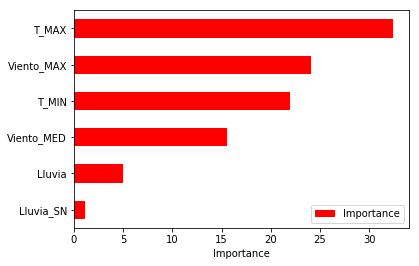

In [229]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Importance")

# varImpPlot(modelo.RF, sort = T, main="Importancia de los Atributos", n.var = 6)

#### XGBoost

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [231]:
xgb_model = XGBClassifier().fit(X_train, y_train)

#library(Matrix)
#sparse_matrix <- sparse.model.matrix( O3_Nivel ~ .-1, data = dfMedidas[,c(atributos,"O3_Nivel")])
#output_vector <- as.numeric(dfMedidas$O3_Nivel)-1
#library(xgboost)
#library(readr)
#library(stringr)
#library(caret)
#library(car)

In [18]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [19]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7

In [21]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [ ]:
# Model Tuning

In [20]:
xgb_params = {
        'n_estimators': [100, 500, 1000],
        'subsample': [0.8, 1.0],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.1,0.01,0.02]}

In [21]:
xgb = XGBClassifier()
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs =-1, verbose = 2)

In [35]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  3.5min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 500, 1000], 'subsample': [0.8, 1.0], 'max_depth': [3, 4, 5], 'learning_rate': [0.1, 0.01, 0.02]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [36]:
xgb_cv_model.best_params_

{'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}

In [232]:
xgb = XGBClassifier(learning_rate = 0.02, 
                    max_depth = 3,
                    n_estimators = 500,
                    subsample = 0.8)

In [233]:
xgb_tuned =  xgb.fit(X_train,y_train)

In [234]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7181818181818181

#### Stacking

In [99]:
df['PM2.5_UMBRAL'] = le.fit_transform(df['PM2.5_UMBRAL'])
df['NO'] = le.fit_transform(df['NO'])
df['NO2'] = le.fit_transform(df['NO2'])
df['SO2'] = le.fit_transform(df['SO2'])

In [100]:
# pip install vecstack

In [101]:
X = df[["T_MAX","T_MIN","NO","NO2","Viento_MAX","Viento_MED","SO2"]]
y = df["PM2.5_UMBRAL"]


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

# library(caret)
# library(caretEnsemble)
# set.seed(10)
# myControl <- trainControl(method="cv", number=5, savePredictions="all", classProbs=TRUE)
# models <-caretList(
#   PM2.5_UMBRAL ~ T_MAX + T_MIN + NO + NO2 + Lluvia + Viento_MAX + Viento_MED + SO2,
#   dfMedidas,
#   methodList=c( "rpart", "knn"),
#   trControl=myControl )

In [102]:
models = [
    KNeighborsClassifier(n_neighbors=5,
                        n_jobs=-1),
        
    RandomForestClassifier(random_state=0, n_jobs=-1, 
                           n_estimators=100, max_depth=3)
]

In [103]:
S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=False,
                          mode='oof_pred_bag',
                           needs_proba=False,
                           save_dir=None,
                           metric=accuracy_score,
                           n_folds=4,
                           stratified=True,
                           shuffle=True,
                           random_state=0,
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [2]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.92187500]
    fold  1:  [0.95312500]
    fold  2:  [0.95312500]
    fold  3:  [0.96825397]
    ----
    MEAN:     [0.94909474] + [0.01688547]
    FULL:     [0.94901961]

model  1:     [RandomForestClassifier]
    fold  0:  [0.95312500]
    fold  1:  [0.96875000]
    fold  2:  [0.93750000]
    fold  3:  [0.96825397]
    ----
    MEAN:     [0.95690724] + [0.01284470]
    FULL:     [0.95686275]



In [117]:
model = RandomForestClassifier(random_state=0, n_jobs=-1, 
                           n_estimators=100, max_depth=3)
    
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)

In [118]:
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.93636364]


#### SVM Máquinas de Soporte Vectorial

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [28]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

# library(liquidSVM)
# set.seed(1)
# modelo.SVM <- mcSVM(O3_Nivel ~ Lluvia_SN + Lluvia + T_MAX + T_MIN + Viento_MAX + Viento_MED, setEntrena, mc_type="AvA_ls", max_gamma = 625)

# predice.modelo.SVM <- predict(modelo.SVM, setValida)
# c <- confusionMatrix(predice.modelo.SVM, setValida$O3_Nivel)
# compara_ACC <- rbind(compara_ACC, c$overall[1])
# row.names(compara_ACC)[nrow(compara_ACC)] <- "SVM"

In [29]:
svm_model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [30]:
y_pred = svm_model.predict(X_test)

In [31]:
accuracy_score(y_test, y_pred)

0.6506849315068494

In [250]:
# Model tuning

In [239]:
svc_params = {"C": np.arange(1,10)} 

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   27.3s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [240]:
print("Best parameters : " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 4}


In [241]:
svc_tuned = SVC(kernel = "linear", C = 4).fit(X_train, y_train)

In [242]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.6818181818181818

#### Celdas de Voronoi

In [120]:
X = df[["Lluvia","T_MAX","T_MIN","Viento_MAX","Viento_MED"]]
y = df["O3_Nivel"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.40, 
                                                    random_state = 42)

In [126]:
svm_voronoi = SVC(kernel = "linear").fit(X_train, y_train)

#modelo.SVMvoronoi <- mcSVM(O3_Nivel ~ Lluvia + T_MAX + T_MIN + Viento_MAX + Viento_MED, setEntrena, voronoi=c(4,50), max_gamma = 15625)
# vor = Voronoi(points)

In [ ]:
# I couldn't find

#### K vecinos próximos. KNN (K-Nearest Neighbors)

In [127]:
X = df[["Lluvia_SN","Lluvia","T_MAX","T_MIN","Viento_MAX","Viento_MED"]]
y = df["O3_Nivel"]


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.40, 
                                                    random_state = 42)

In [128]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

# library(caret)
# set.seed(10)
# modelo.KNN <- train(O3_Nivel ~ Lluvia_SN + Lluvia + T_MAX + T_MIN + Viento_MAX + Viento_MED,
#                     data = setEntrenaNUM, method = "knn",
#                     trControl=trainControl(method = "repeatedcv", number = 8, repeats = 4),
#                     preProcess = c("center", "scale"), tuneLength = 10)
# plot(modelo.KNN)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [129]:
y_pred = knn_model.predict(X_test)

In [132]:
accuracy_score(y_test, y_pred)

0.6643835616438356

In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.53      0.56        59
           1       0.40      0.18      0.25        11
           2       0.71      0.84      0.77        76

   micro avg       0.66      0.66      0.66       146
   macro avg       0.57      0.52      0.53       146
weighted avg       0.65      0.66      0.65       146



In [135]:
# Model Tuning

In [136]:
knn_params = {"n_neighbors" : np.arange(1,50)}

In [138]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=8)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=8, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [140]:
print("Best score:" + str(knn_cv.best_score_))
print("Best parameters: " + str(knn_cv.best_params_))

Best score:0.7397260273972602
Best parameters: {'n_neighbors': 9}


In [141]:
knn = KNeighborsClassifier(9)
knn_tuned = knn.fit(X_train, y_train)

In [143]:
y_pred = knn_tuned.predict(X_test)

In [144]:
accuracy_score(y_test, y_pred)

0.6712328767123288

## Comparación

In [249]:
models = [
    #res_model
    knn_tuned,
    svc_tuned,
    nb_model,
    #nb_red
    adaboost_model,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    xgb_tuned 
]


for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(acc))
    
# formattable(round(compara_ACC,2))

----------------------------
KNeighborsClassifier:
Accuracy: 69.0909%
----------------------------
SVC:
Accuracy: 68.1818%
----------------------------
GaussianNB:
Accuracy: 62.7273%
----------------------------
AdaBoostClassifier:
Accuracy: 59.0909%
----------------------------
DecisionTreeClassifier:
Accuracy: 69.0909%
----------------------------
RandomForestClassifier:
Accuracy: 70.0000%
----------------------------
GradientBoostingClassifier:
Accuracy: 68.1818%
----------------------------
XGBClassifier:
Accuracy: 71.8182%


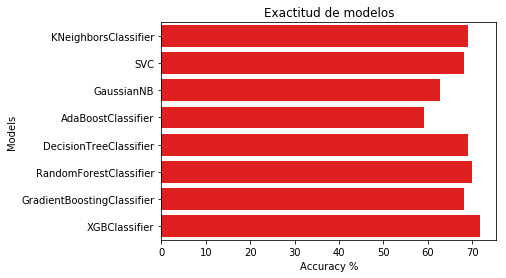

In [255]:
result = []

results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)    
    result = pd.DataFrame([[names, acc*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, color="r")
plt.xlabel('Accuracy %')
plt.title('Exactitud de modelos');

# library(formattable)
# barplot(sort(compara_ACC[,1]), names.arg = rownames(compara_ACC)[order(compara_ACC[,1])], 
#         las=2, ylim = c(0,1))
# text(x=(0:11)*1.2+0.6, y = 0.02 + compara_ACC[order(compara_ACC[,1]),],
#      round(compara_ACC[order(compara_ACC[,1]),],2))